### An Analytic Report and Research Proposal on a dataset of your choosing

#### FEMA

https://www.kaggle.com/fema/federal-disasters/

The president can declare an emergency for any occasion or instance when the President determines federal assistance is needed. Emergency declarations supplement State and local or Indian tribal government efforts in providing emergency services, such as the protection of lives, property, public health, and safety, or to lessen or avert the threat of a catastrophe in any part of the United States. The total amount of assistance provided for in a single emergency may not exceed $5 million.

The president can declare 

A major disaster declaration provides a wide range of federal assistance programs for individuals and public infrastructure, including funds for both emergency and permanent work.


Interesting questions

- What type of disaster is the most commonly declared by FEMA? 
- Which disasters or emergencies have lasted the longest? 
- What disaster was declared in the most counties or states? 
- Has the number of disasters declared by FEMA risen or fallen over time?

1 - Describe your dataset. 
Describe and explore your dataset in the initial section of your Report. 

* What does your data contain and what is its background? 

This dataset include a record for every federal emergency or disaster declared by the President of the United States since 1953.

* Where does it come from? 
This dataset is taken from Kaggle 

* Why is it interesting or significant? 

It is interesting because although we hear about disaster and state of emergencies, not too many people understand what that is. A major disaster for any natural event, including any hurricane, tornado, storm, high water, wind-driven water, tidal wave, tsunami, earthquake, volcanic eruption, landslide, mudslide, snowstorm, or drought, or, regardless of cause, fire, flood, or explosion, that the President determines has caused damage of such severity that it is beyond the combined capabilities of state and local governments to respond. 

I live in FL and we battle hurricane every year as the natural disaster. So, this is significant to me to see the trend of this natural disaster and more importantly, how has it changed since 1953. 

* Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

The summary statistics that is conducted here include 
 - What is the top 5 types of disasters caused since 1953
 - Considering the disterer type "Hurricane", what are the different hurricane titles we encountered since 1953


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from dateutil.relativedelta import relativedelta
from datetime import date


In [2]:
# making sure that the data is there and it looks good to do some analysis

data = pd.read_csv('datasets/FEMA-database.csv')

data.head(5)

# what size data are we looking at
#print(data.shape)


,Declaration_Number,Declaration_Type,Declaration_Date,State,County,Disaster_Type,Disaster_Title,Start_Date,End_Date,Close_Date,Individual_Assistance_Program,Individuals_Households_Program,Public_Assistance_Program,Hazard_Mitigation_Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


Text(0, 0.5, 'Count')

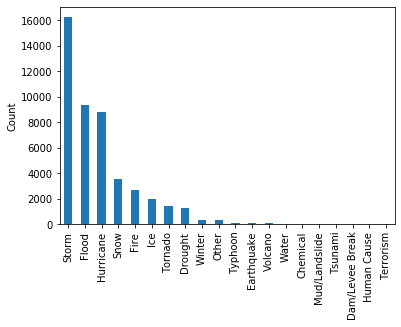

In [3]:
# lets take a look at all the disaster types that are included

data.Disaster_Type.value_counts().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

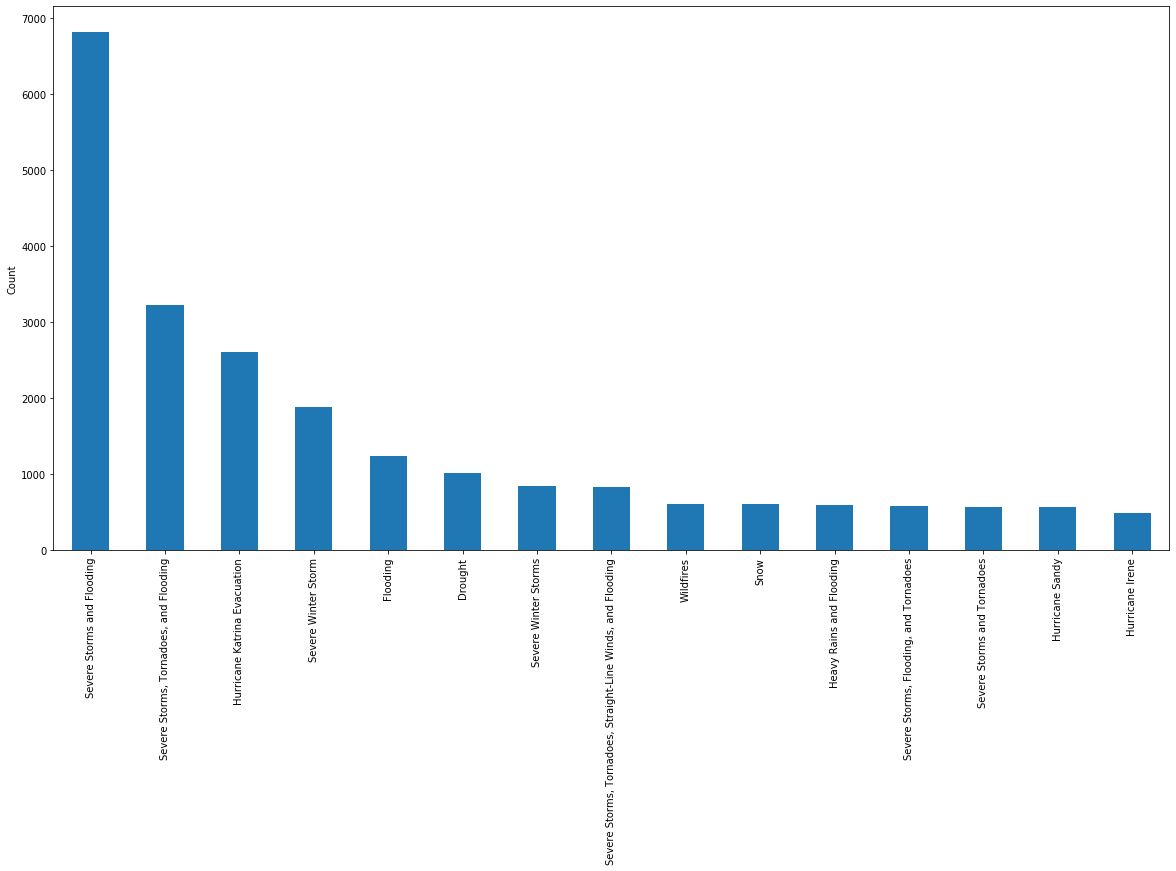

In [4]:
# all disaster title
#data.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
data.Disaster_Title.value_counts().head(15).plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')

Text(0, 0.5, 'Count')

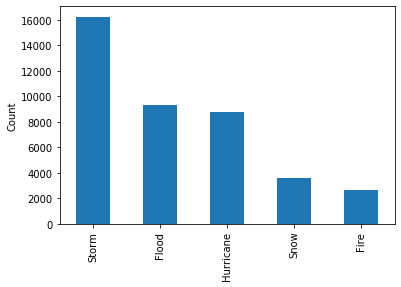

In [5]:
# what are the top 5 disasters that took place since 1953

data.Disaster_Type.value_counts().head(5).plot(kind='bar')
plt.ylabel('Count')

# looks like storm is the #1 disaster

Text(0, 0.5, 'Count')

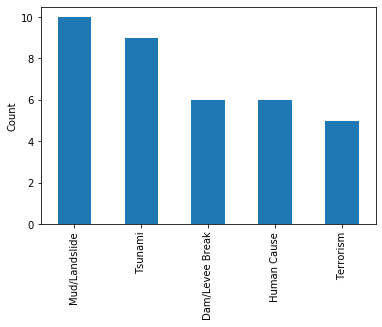

In [6]:
# What are the least 5 disasters that took place since 1953
data.Disaster_Type.value_counts().tail(5).plot(kind='bar')
plt.ylabel('Count')

#looks like Terrorism is at the bottom

Text(0, 0.5, 'Count')

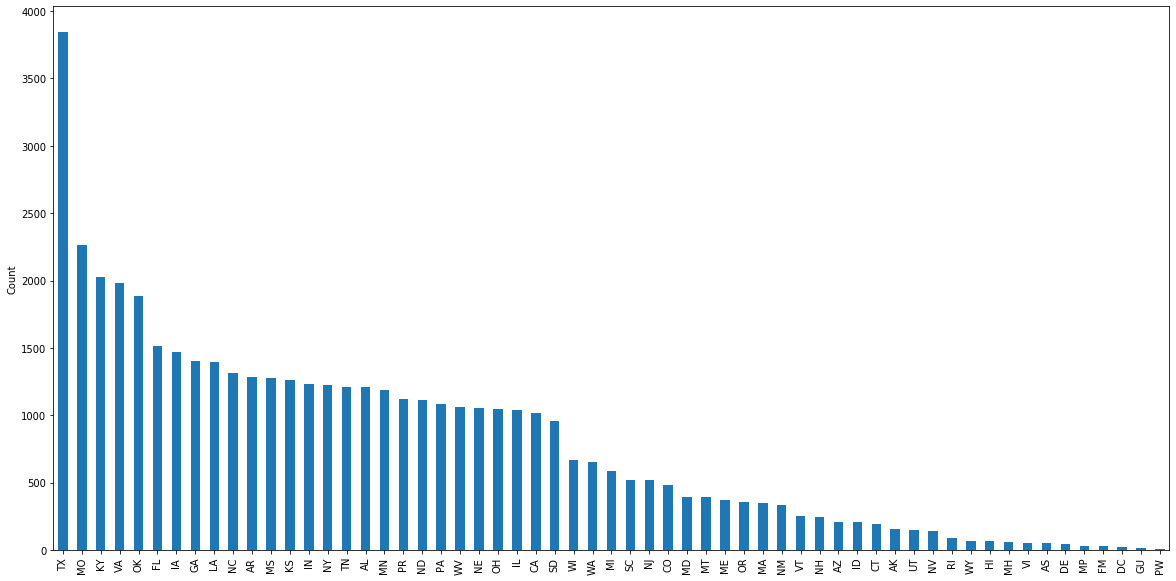

In [7]:
# - What are the top 10 states with the highest amount of disasters since 1954
#    - What are the top 5 disasters in those states
    
#state = data.groupby(['State','Disaster_Type'])['Disaster_Title'].count()
#state = newpd.groupby('State').count()[['Disaster_Type']]

#Make the graph bigger figure, size parameter -> figsize=(20,10)

data.State.value_counts().plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')


#state = data.State.value_counts()
#state


Text(0, 0.5, 'Count')

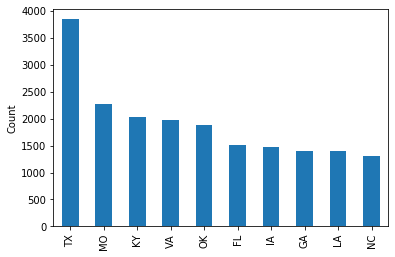

In [8]:
data.State.value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')

In [9]:
# lets look at just the hurricane data 

hurricane_df = data[data['Disaster_Type'] == 'Hurricane']

#hurricane_df
#data[data['Disaster_Type'] == 'Storm']
# data[data['Disaster_Type'] == 'Hurricane'].shape 

# 8764, 14 out of the ~46K data is hurricane

Text(0, 0.5, 'Count')

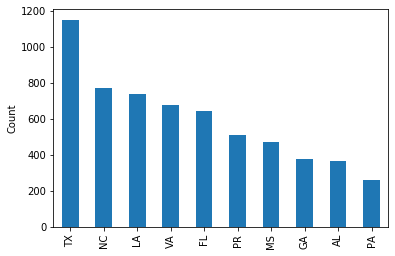

In [10]:
hurricane_df.State.value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

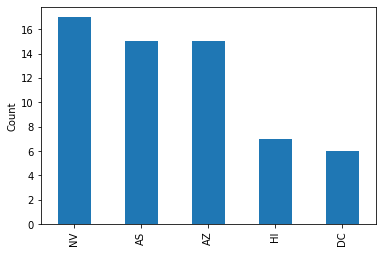

In [11]:
hurricane_df.State.value_counts().tail(5).plot(kind='bar')
plt.ylabel('Count')

In [12]:
# What are the top 5 disasters in those states

# breakdown of diasters for the top 5 states

data.groupby(['State','Disaster_Type'])['Disaster_Title'].count()
#data.groupby('State').count()[['Disaster_Type']]


State  Disaster_Type
AK     Earthquake         7
       Fire              16
       Flood             46
       Other              4
       Snow               4
       Storm             64
       Winter            14
AL     Drought           67
       Fire              11
       Flood            104
       Hurricane        368
       Snow              67
       Storm            529
       Tornado           61
AR     Drought           32
       Flood            235
       Hurricane         93
       Ice              207
       Snow              17
       Storm            603
       Tornado           95
AS     Drought            5
       Earthquake         5
       Flood              5
       Hurricane         15
       Storm              7
       Typhoon           18
AZ     Drought            8
       Fire              44
       Flood             77
                       ... 
VT     Storm            115
WA     Drought           16
       Earthquake        30
       Fire              78

2 - Ask and answer analytic questions. 
* Ask three analytic questions and answer each one with a combination of statistics and visualizations. 
* These analytic questions can focus on individuals behaviors or comparisons of the population.

- How many named hurricane have we encountered since 1953
 - what is the longest hurricane 
    - distribution of the hurricanes by plotting it on a histogram
    - mean and std deviation
 - look into the various hurricanes
 - describe

In [13]:
hurricane_df

,Declaration_Number,Declaration_Type,Declaration_Date,State,County,Disaster_Type,Disaster_Title,Start_Date,End_Date,Close_Date,Individual_Assistance_Program,Individuals_Households_Program,Public_Assistance_Program,Hazard_Mitigation_Program
20,DR-22,Disaster,09/02/1954,MA,NaN,Hurricane,Hurricanes,09/02/1954,09/02/1954,12/01/1956,Yes,No,Yes,Yes
21,DR-23,Disaster,09/02/1954,RI,NaN,Hurricane,Hurricanes,09/02/1954,09/02/1954,12/01/1956,Yes,No,Yes,Yes
22,DR-24,Disaster,09/13/1954,ME,NaN,Hurricane,Hurricanes,09/13/1954,09/13/1954,12/01/1956,Yes,No,Yes,Yes
23,DR-25,Disaster,09/17/1954,CT,NaN,Hurricane,Hurricanes,09/17/1954,09/17/1954,01/01/1957,Yes,No,Yes,Yes
24,DR-26,Disaster,10/07/1954,NY,NaN,Hurricane,Hurricanes,10/07/1954,10/07/1954,12/01/1956,Yes,No,Yes,Yes
26,DR-28,Disaster,10/17/1954,NC,NaN,Hurricane,Hurricane,10/17/1954,10/17/1954,01/01/1959,Yes,No,Yes,Yes
27,DR-29,Disaster,10/17/1954,SC,NaN,Hurricane,Hurricane,10/17/1954,10/17/1954,01/01/1959,Yes,No,Yes,Yes
35,DR-37,Disaster,08/13/1955,NC,NaN,Hurricane,Hurricanes,08/13/1955,08/13/1955,02/10/1961,Yes,No,Yes,Yes
37,DR-39,Disaster,08/20/1955,RI,NaN,Hurricane,Hurricane and Flood,08/20/1955,08/20/1955,04/01/1961,Yes,No,Yes,Yes
39,DR-41,Disaster,08/20/1955,NJ,NaN,Hurricane,Hurricane and Floods,08/20/1955,08/20/1955,02/01/1957,Yes,No,Yes,Yes


Text(0, 0.5, 'Count')

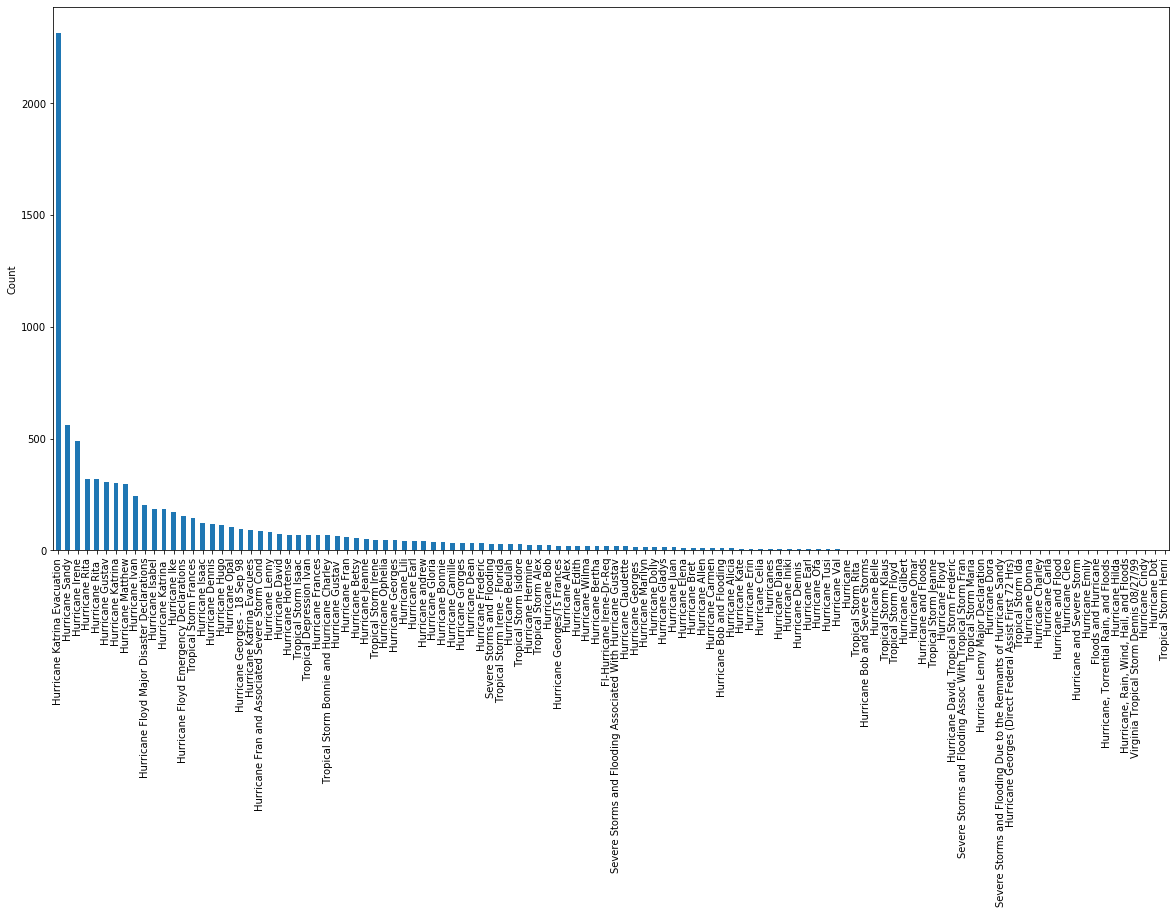

In [14]:
# distribution of the hurricanes by plotting it on a histogram

hurricane_df.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')

# this data does not seem very interesting because as you can see from the results that the data may not be correct
# The max number says hurricane Katrina evacuation - which is strange because why would the evacuation data be there 


### comment about the data inconsistencies

## https://courses.thinkful.com/dsbc-data-vis-1-v1/checkpoint/4 to clean up the data for example Katrina, Rita etc should be cleaned up

## Then try to graph


/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

count    8764.000000
mean       22.594363
std        15.223689
min         1.000000
25%        10.000000
50%        21.000000
75%        34.000000
max        68.000000
Name: Duration, dtype: float64


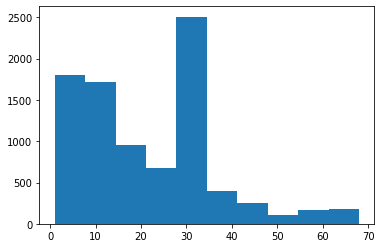

In [27]:
#Get the days that the hurricane lasted - then find the mean, std dev


#hurricane_df.groupby(['State','Disaster_Title'])['Disaster_Title'].count()

hurricane_df['End_Date'] = pd.to_datetime(hurricane_df['End_Date'])
hurricane_df['Start_Date'] = pd.to_datetime(hurricane_df['Start_Date'])

#hurricane_df.info()


hurricane_df['Duration'] = hurricane_df['End_Date'] - hurricane_df['Start_Date']
hurricane_df['Duration'] = hurricane_df['Duration']/np.timedelta64(1,'D')

hurricane_df['Duration'] = hurricane_df['Duration'].add(1)

#print(hurricane_df)

print(hurricane_df['Duration'].describe())
#hurricane_df['Duration'].plot(kind='bar', figsize=(20,10))
#plt.ylabel('Count')

plt.hist(hurricane_df['Duration'])
plt.show()


/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Text(0, 0.5, 'Count')

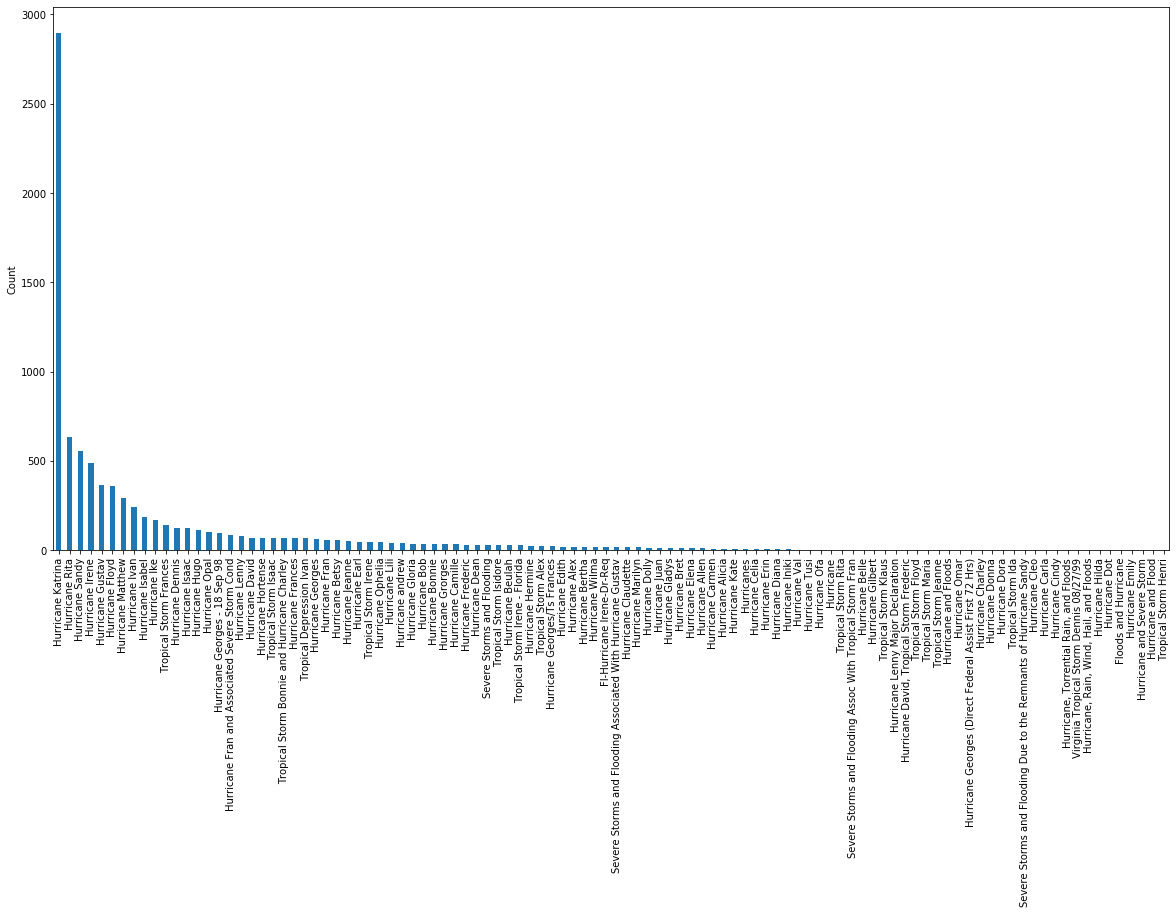

In [25]:
hurricane_title_df = hurricane_df
hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.strip()


#hurricane_title_df.replace({'Disaster_Title':r'^Hurricanes Katrina. $'}, {'Disaster_Title':'Hurricane Katrina'}, regex=True)

hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Katrina.*','Hurricane Katrina')
hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Floyd.*','Hurricane Floyd')
hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Bob.*','Hurricane Bob')

hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'^Irene.*','Hurricane Irene')

#hurricane_title_df
#print(hurricane_df['Disaster_Title'] == 'Hurricane Katrina')



hurricane_df.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')

In [ ]:
# What was the higest and lowest amount of hurricanes that tool place? 

#state = newpd.groupby('State').count()[['Disaster_Type']]
#state.Disaster_Type.max() #1151
#state.Disaster_Type.min() # 6

Text(0, 0.5, 'Count')

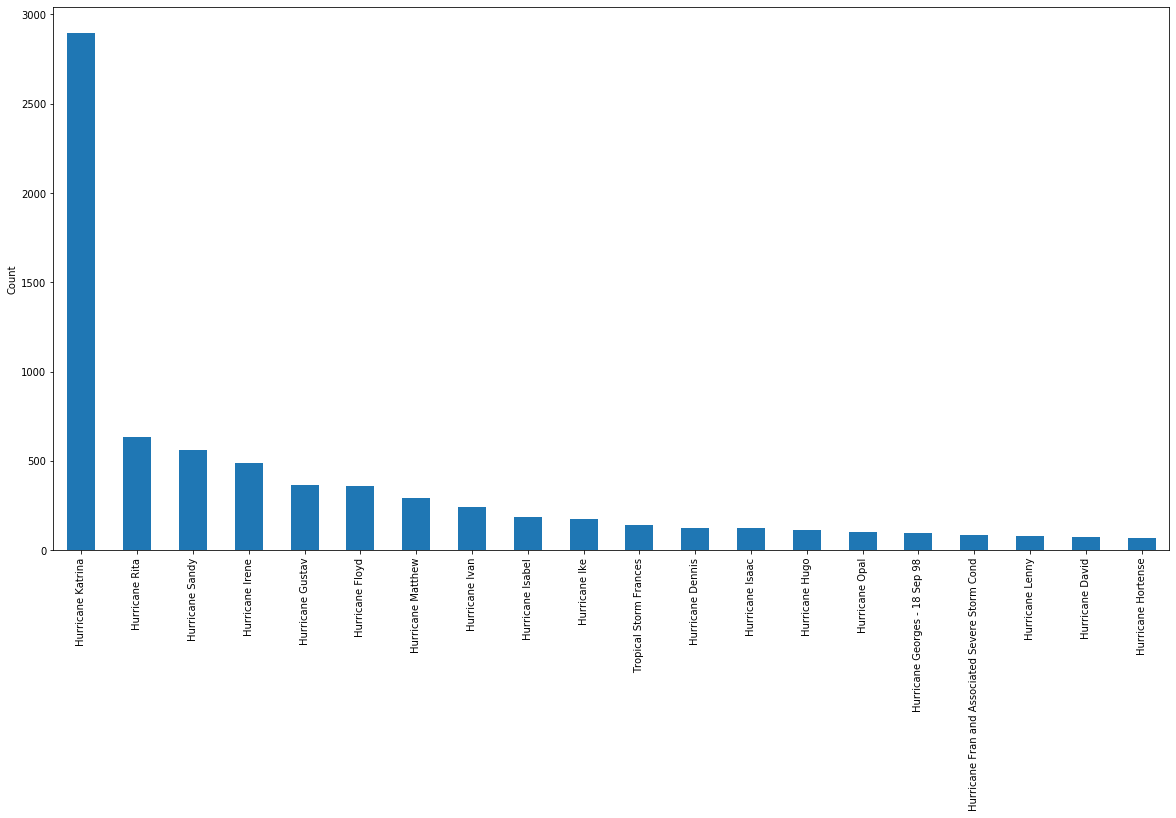

In [29]:
hurricane_df.Disaster_Title.value_counts().head(20).plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')

3 - Propose further research. 
* Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. 
* Just like your earlier questions, your research proposal should present one or more clear questions. 
* Then you should describe the techniques you would apply in order to arrive at an answer.



- What is the most likely disaster event that I should prepare for? If I were an insurance company, what diaster would I be looking at to predict my business?


An example: https://medium.com/@jasoncrease/was-2016-especially-dangerous-for-celebrities-79d79b9fae02#.zd8hv5jge

Rubric for grading: https://docs.google.com/spreadsheets/d/18Z0aaE6mWIhUomdzfVZqYeAzw51-iEz_lGHIPwM-3ls/edit#gid=0